In [1]:
import pandas as pd
import numpy as np 
import requests
from io import StringIO
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from matplotlib.ticker import FuncFormatter
from sklearn.ensemble import RandomForestRegressor
import json
from datetime import datetime
import seaborn as sns

In [2]:
df_covid_limpio = pd.read_csv('df_covid_limpio.csv', sep=',')
df_covid_limpio.head()

,Date_reported,Country_code,Country,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths,lethality_rate
0,2022-03-27,AS,American Samoa,1881,3278,2,2,0.061013
1,2022-04-03,AS,American Samoa,1378,4656,5,7,0.150344
2,2022-04-10,AS,American Samoa,746,5402,4,11,0.203628
3,2022-04-17,AS,American Samoa,133,5535,7,18,0.325203
4,2022-04-24,AS,American Samoa,230,5765,5,23,0.398959


In [3]:
df_population_limpio = pd.read_csv('df_population_limpio.csv', sep=',')
df_population_limpio.head()

,Country_code,Total_Population,Male_Population,Female_Population,Population_Density,Life_Expectancy
0,BI,11874000000,5894000000,5980000000,457,62
1,KM,790000000,397000000,393000000,425,64
2,DJ,1073000000,533000000,540000000,46,63
3,ER,3498000000,1724000000,1773000000,28,67
4,ET,114120000000,57375000000,56745000000,114,65


In [6]:
#Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

In [7]:
#Luego, seleccionamos los 10 primeros países y guardamos el resultado en top_10_paises.
top_10_paises = total_por_pais.nlargest(10)

In [8]:
#Retiro de la variable total_por_pais los 10 países identificados en top_10_paises, así tendré una Series con todos los demás países fuera del top 10, sumo todos los valores restantes de total_por_pais y lo almaceno en la variable otros.
otros = total_por_pais.drop(top_10_paises.index).sum()

In [10]:
#Finalmente, creo un nuevo registro llamado 'Otros' en top_10_paises con el valor de la variable otros.
top_10_paises['Otros'] = otros
top_10_paises

Country
China                                                    99325108
France                                                   38997490
Germany                                                  38437756
Republic of Korea                                        34571873
Japan                                                    33803572
Italy                                                    26662875
United Kingdom of Great Britain and Northern Ireland     24872653
Türkiye                                                  17004677
Spain                                                    13980340
Australia                                                11741694
Otros                                                   114572485
Name: Cumulative_cases, dtype: int64

In [11]:
#Usando el dataframe df_covid_limpio, vamos a agrupar por país y obtener el máximo valor de la columna Cumulative_cases, luego lo ordenamos descendentemente y guardamos el resultado en total_por_pais.
total_por_pais = df_covid_limpio.groupby('Country')['Cumulative_cases'].max().sort_values(ascending=False)

In [12]:
#Luego, seleccionamos los 5 primeros países y guardamos el resultado en top_5_paises.
top_5_paises = total_por_pais.nlargest(5)

In [13]:
#Reiniciamos el índice de df_covid_limpio y lo almacenamos en df_covid_limpio_reset.
df_covid_limpio_reset = df_covid_limpio.reset_index()

In [14]:
#De este nuevo dataframe df_covid_limpio_reset mantengo sólo los registros cuyo país esté dentro de top_5_paises.
df_top_5 = df_covid_limpio_reset[df_covid_limpio_reset['Country'].isin(top_5_paises.index)]

In [15]:
#De este nuevo dataframe df_covid_limpio_reset mantengo sólo los registros cuyo país esté dentro de top_5_paises.
#Finalmente, realizamos un pivot sobre df_top_5 para tener los países como índices y las fechas como columnas, y almacenamos el resultado en total_acumulado_top_5.
total_acumulado_top_5 = df_top_5.pivot(index='Country', columns='Date_reported', values='Cumulative_cases').fillna(0)
total_acumulado_top_5

Date_reported,2020-02-23,2020-03-01,2020-03-08,2020-03-15,2021-08-15,2021-08-22,2021-08-29,2021-09-05,2021-09-12,2021-09-19,...,2023-11-12,2023-11-19,2023-11-26,2023-12-03,2023-12-10,2023-12-17,2023-12-24,2023-12-31,2024-01-07,2024-01-14
Country,,,,,,,,,,,,,,,,,,,,,
China,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,99319568.0,99320035.0,99320425.0,99320845.0,99321242.0,99321637.0,99322142.0,99322727.0,99323756.0,99325108.0
France,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0,38997490.0
Germany,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0,38437756.0
Japan,132.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0,33803572.0
Republic of Korea,556.0,3526.0,7134.0,8162.0,225481.0,237778.0,250049.0,261777.0,274413.0,287534.0,...,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0,34571873.0


In [77]:
import seaborn as sns

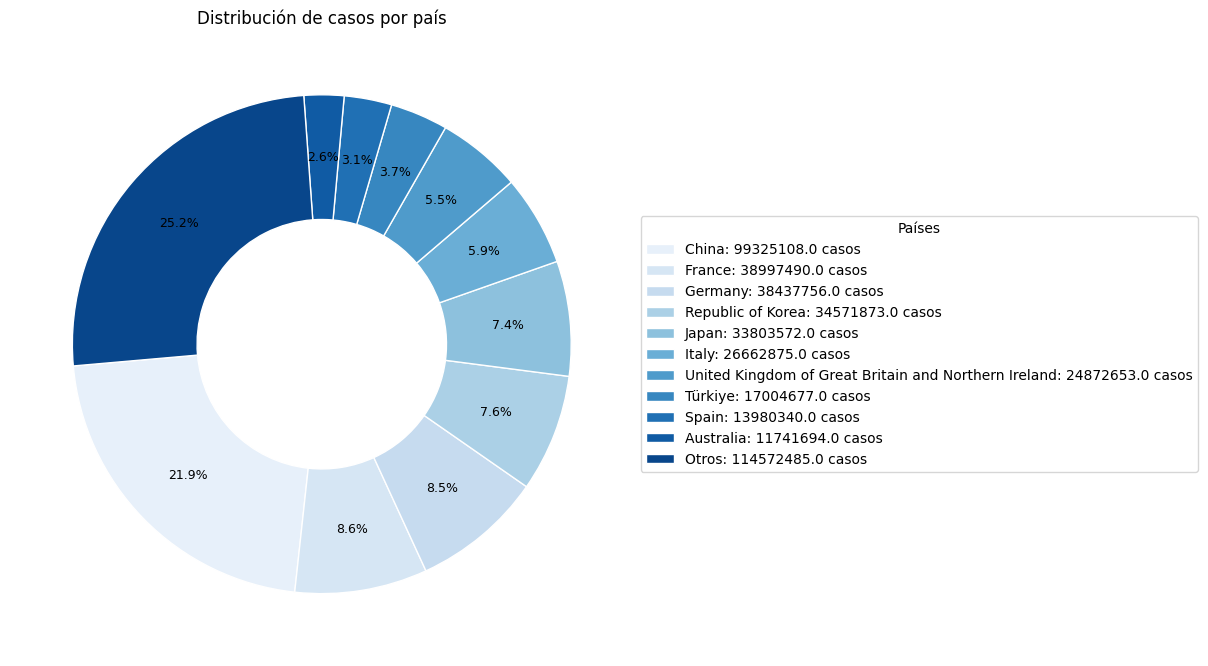

In [78]:
# Convertir las cadenas de fecha a objetos de fecha
columnas_fecha = pd.to_datetime(total_acumulado_top_5.columns)

# Calcular la diferencia en días
days_since_start = (columnas_fecha - columnas_fecha[0]).days

# Gráfico de Donuts
fig, axs = plt.subplots(1, 1, figsize=(11, 8)) 

#Cambiar a color azul 
colores_azules = sns.color_palette("Blues", n_colors=len(top_10_paises))

# Gráfico de Donuts
wedges, texts, autotexts = axs.pie(top_10_paises, autopct='%1.1f%%', textprops={'fontsize': 9},
                                   pctdistance=0.75, startangle=185, wedgeprops=dict(width=0.5, edgecolor='w'), colors=colores_azules)

# Añadir un título al gráfico
plt.title("Distribución de casos por país")

# Crear una leyenda personalizada fuera del gráfico
legend_labels = [f'{label}: {percentage:.1f} casos' for label, percentage in zip(top_10_paises.index, top_10_paises)]
axs.legend(wedges, legend_labels, title="Países", loc="center left", bbox_to_anchor=(1, 0.5))

# Ajustar el diseño de los subgráficos
plt.tight_layout()

# Mostrar la figura
plt.show()



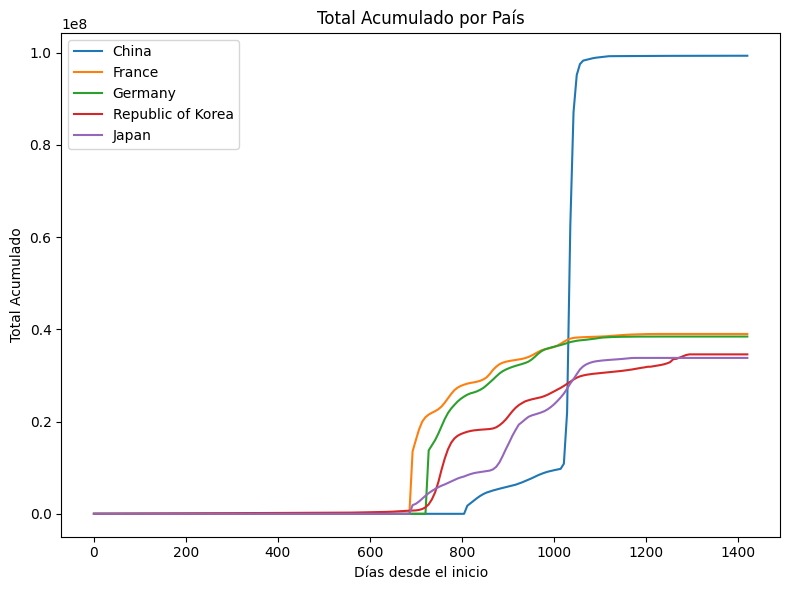

In [76]:
# Gráfico de Líneas
fig_lineas, ax_lineas = plt.subplots(figsize=(8, 6))

# Gráfico de Líneas
for pais in top_5_paises.index:
    ax_lineas.plot(days_since_start, total_acumulado_top_5.loc[pais], label=pais)

ax_lineas.set_title('Total Acumulado por País')
ax_lineas.set_xlabel('Días desde el inicio')
ax_lineas.set_ylabel('Total Acumulado')
ax_lineas.legend()

# Ajustar el diseño del gráfico de líneas
fig_lineas.tight_layout()

# Mostrar el gráfico de líneas
plt.show()

